<a href="https://colab.research.google.com/github/ssfatemi/DL-ML-Tutorial/blob/main/DL-mini-projects/Persian_handwrited_digits_recognition/Persian_digits_recognition_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persian handwritten digits classification using neural network and datasets in kaggle


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Loading Kaggle Dataset



1.   Create a Kaggle API in Kaggle Website setting
2.   Download the API file and upload it to Files in Colab
3.   Run the following Code ( you may want to change the dataset)



In [8]:
!pip install kaggle
import json
import os

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d amirmahdiabbootalebi/persian-handwritten-digits

Dataset URL: https://www.kaggle.com/datasets/amirmahdiabbootalebi/persian-handwritten-digits
License(s): CC0-1.0
 58% 68.0M/117M [00:00<00:00, 708MB/s]
100% 117M/117M [00:00<00:00, 685MB/s] 


In [9]:
!unzip '/content/persian-handwritten-digits.zip' -d '/content/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Train/class_9/image_5499.jpg  
  inflating: /content/data/Train/class_9/image_55.jpg  
  inflating: /content/data/Train/class_9/image_550.jpg  
  inflating: /content/data/Train/class_9/image_5500.jpg  
  inflating: /content/data/Train/class_9/image_5501.jpg  
  inflating: /content/data/Train/class_9/image_5502.jpg  
  inflating: /content/data/Train/class_9/image_5503.jpg  
  inflating: /content/data/Train/class_9/image_5504.jpg  
  inflating: /content/data/Train/class_9/image_5505.jpg  
  inflating: /content/data/Train/class_9/image_5506.jpg  
  inflating: /content/data/Train/class_9/image_5507.jpg  
  inflating: /content/data/Train/class_9/image_5508.jpg  
  inflating: /content/data/Train/class_9/image_5509.jpg  
  inflating: /content/data/Train/class_9/image_551.jpg  
  inflating: /content/data/Train/class_9/image_5510.jpg  
  inflating: /content/data/Train/class_9/image_5511.jpg  
  inflating: /content/dat

In [10]:
os.getcwd()
!ls /content/data

Test  Train


## Organizing the data

In [12]:
# Set the paths to your directories
train_dir = '/content/data/Train'
test_dir = '/content/data/Test'

# Load training data
batch_size=100

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
#    image_size=(height, width),
    batch_size=batch_size
)

# Load testing data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
#    image_size=(height, width),
    batch_size=batch_size
)

Found 100000 files belonging to 10 classes.
Found 50000 files belonging to 10 classes.


Draw some Samples

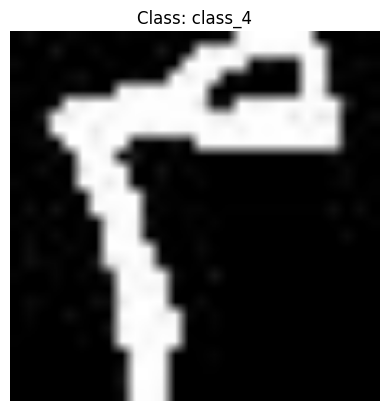

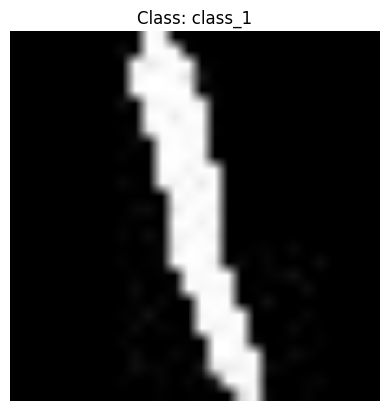

In [25]:
for images, labels in train_ds.take(2):
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Class: {train_ds.class_names[labels[0]]}")
    plt.axis('off')
    plt.show()

In [26]:
(X_train, y_train) , (X_test, y_test) = (train_ds.file_paths, train_ds.class_names) , (test_ds.file_paths, test_ds.class_names)

In [28]:
print(len(X_train),len(X_test))

100000 50000


In [29]:
X_train[0].shape

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4886 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3060 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2848 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2747 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9262


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 985us/step - loss: 0.2670 - accuracy: 0.9257


[0.26697656512260437, 0.9257000088691711]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.7270680e-05, 1.3593615e-10, 4.5622761e-05, 7.5602829e-03,
       1.3076769e-06, 7.5061922e-05, 1.7646971e-09, 6.9968843e-01,
       7.8440302e-05, 8.1232190e-04], dtype=float32)

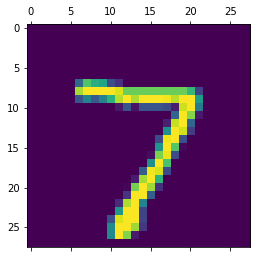

In [ ]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,   10,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    7,  929,   11,    5,    4,   15,    8,   42,    4],
       [   3,    0,   23,  910,    0,   27,    6,   11,   23,    7],
       [   1,    1,    2,    1,  915,    0,   16,    4,   10,   32],
       [  11,    2,    2,   27,    9,  773,   23,    4,   33,    8],
       [   7,    3,    5,    1,    7,    7,  925,    2,    1,    0],
       [   1,    6,   25,    5,    8,    0,    0,  941,    2,   40],
       [   7,    5,    7,   18,    9,   22,   11,    8,  880,    7],
       [  11,    7,    1,   10,   32,    6,    0,   18,    9,  915]])>

Text(69.0, 0.5, 'Truth')

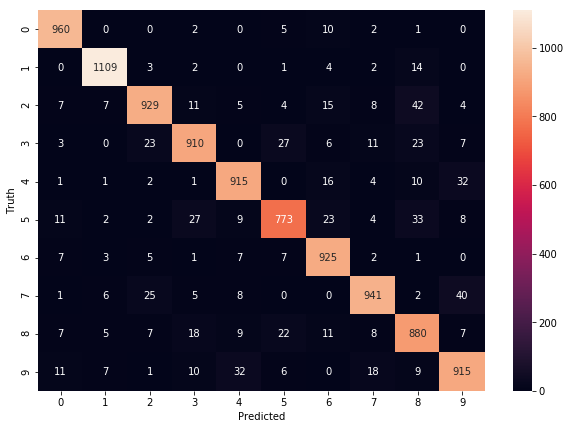

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1366 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0981 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0618 - accuracy: 0.9812


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9716


[0.09658893942832947, 0.9715999960899353]

Text(69.0, 0.5, 'Truth')

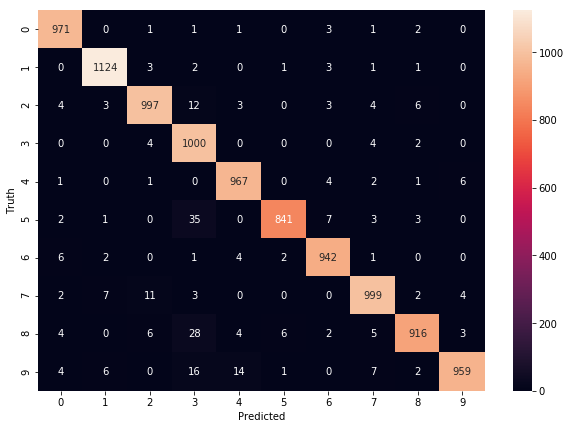

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.026

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9779


[0.08133944123983383, 0.9779000282287598]